In [1]:
# import libraries
using ITensors 
using Plots

In [2]:
# function definition 
function Wilson_Fermion(N::Integer,m₀::Float64,g²::Float64,r::Float64,sw::Integer)
    L = 2N;
    l = L-2;
    aₗ = 1.0/L;
    aₛ = 1.0/l;
    BD = 2^N;
    sites = siteinds("Fermion",L)
    ampoₗ = OpSum()
    ampoₛ = OpSum()
    ##################################################
    # larger lattice 
    # H_0 1
    for j in 1:2:L-2
        ampoₗ -= (1im/2aₗ),"C",j,"Cdag",j+2
        ampoₗ += (1im/2aₗ),"C",j+2,"Cdag",j
    end
    # H_0 2
    for j in 2:2:L-2
        ampoₗ += (1im/2aₗ),"C",j,"Cdag",j+2
        ampoₗ -= (1im/2aₗ),"C",j+2,"Cdag",j
    end
    # H_m     
    for j in 1:2:(L-1)
        ampoₗ -= (1im*m₀),"Cdag",j,"Cdag",j+1
        ampoₗ += (1im*m₀),"C",j+1,"C",j           
    end
   # H_g
    for j in 1:2:L-1      
        ampoₗ -= (g²/2aₗ),"C * Cdag",j,"Cdag * C",j+1
        ampoₗ -= (g²/2aₗ),"Cdag * C",j,"C * Cdag",j+1
    end
    ################################
    # H_W
    # H_W 1
    for j in 2:2:(L-1)
        ampoₗ += (1im*r/2aₗ),"C",j,"Cdag",j+1
        ampoₗ -= (1im*r/2aₗ),"C",j+1,"Cdag",j
    end
    # H_W 2
    for j in 1:2:(L-3)
        ampoₗ += (1im*r/2aₗ),"Cdag",j,"C",j+3
        ampoₗ -= (1im*r/2aₗ),"Cdag",j+3,"C",j
    end
    # H_W 3
    for j in 1:2:(L-1)
        ampoₗ -= (2im*r/aₗ),"Cdag",j,"C",j+1
        ampoₗ += (2im*r/aₗ),"Cdag",j+1,"C",j
    end
########################################################
    # Smaller lattice 
    # H_0 1
    for j in 1:2:l-2
        ampoₛ -= (1im/2aₛ),"C",j,"Cdag",j+2
        ampoₛ += (1im/2aₛ),"C",j+2,"Cdag",j
    end
    # H_0 2
    for j in 2:2:l-2
        ampoₛ += (1im/2aₛ),"C",j,"Cdag",j+2
        ampoₛ -= (1im/2aₛ),"C",j+2,"Cdag",j
    end
    # H_m
    for j in 1:2:(l-1)    
        ampoₛ -= (1im*m₀),"Cdag",j,"Cdag",j+1    
        ampoₛ += (1im*m₀),"C",j+1,"C",j
    end
   # H_g
    for j in 1:2:(l-1)  
        ampoₛ -= (g²/2aₛ),"C * Cdag",j,"Cdag * C",j+1
        ampoₛ -= (g²/2aₛ),"Cdag * C",j,"C * Cdag",j+1
    end
    # H_W
    # H_W 1
    for j in 2:2:(l-1)
        ampoₛ += (1im*r/2aₛ),"C",j,"Cdag",j+1
        ampoₛ -= (1im*r/2aₛ),"C",j+1,"Cdag",j
    end
    # H_W 2
    for j in 1:2:(l-3)
        ampoₛ += ((1im*r)/(2aₛ)),"Cdag",j,"C",j+3  
        ampoₛ -= (1im*r/(2aₛ)),"Cdag",j+3,"C",j
    end
    # H_W 3
    for j in 1:2:(l-1)
        ampoₛ -= (1im*r/(aₛ)),"Cdag",j,"C",j+1
        ampoₛ += (1im*r/(aₛ)),"Cdag",j+1,"C",j
    end
    #####################################################
    # Initial parameters
    ψ₀ₗ = randomMPS(sites,BD)
    ψ₀ₛ = randomMPS(sites[1:l],BD)
    Hₗ = MPO(ampoₗ,sites)
    Hₛ = MPO(ampoₛ,sites[1:l])
    sweep = Sweeps(sw)
    setmaxdim!(sweep,repeat([500],sw)...)
    setcutoff!(sweep,1E-10)
    eₗ, ψₗ = dmrg(Hₗ,ψ₀ₗ,sweep)
    eₛ, ψₛ = dmrg(Hₛ,ψ₀ₛ,sweep)
    ###############################################
    # new method for overlap computation
    t1 = ITensor(sites[L-1:L])
    for j in 1:4
        t1[j]=1.0/2
    end
      #  Overlap computation
    v = ITensor(1.0)
    for j in 1:L
        if j <= l
            v = v*dag(ψₛ[j])*ψₗ[j]
        else
            v = v*t1*ψₗ[j]
        end
    end
    return inner(v,v), norm(v)
end

Wilson_Fermion (generic function with 1 method)

In [3]:
# 2
# first computation
# Wilson_Fermion(L::Integer,m₀::Float64,g²::Float64,r::Float64,sw::Integer)
Wilson_Fermion(3,0.8,1.5,0.71,3)

After sweep 1 energy=-41.0931664862852  maxlinkdim=8 maxerr=2.73E-16 time=39.116
After sweep 2 energy=-41.093166518074696  maxlinkdim=8 maxerr=2.75E-16 time=0.009
After sweep 3 energy=-41.093166518074696  maxlinkdim=8 maxerr=1.77E-16 time=0.008
After sweep 1 energy=-12.721774151334628  maxlinkdim=4 maxerr=4.55E-16 time=0.006
After sweep 2 energy=-12.72177415950984  maxlinkdim=4 maxerr=5.48E-16 time=0.007
After sweep 3 energy=-12.721774159509836  maxlinkdim=4 maxerr=3.23E-16 time=0.008


(0.475126781563576 + 0.0im, 0.6892944084812933)

In [4]:
# 3
inner_W_F = Vector{ComplexF64}()
norm_W_F = Vector{Float64}()

for j in 2:10  # 2:15 not available
    println("j = $j")
    n1,n2 = Wilson_Fermion(j,0.4,1.0,0.71,3)
    push!(inner_W_F,n1)
    push!(norm_W_F,n2)
end

j = 2
After sweep 1 energy=-16.13230218104706  maxlinkdim=4 maxerr=5.50E-16 time=0.005
After sweep 2 energy=-16.132302252157373  maxlinkdim=4 maxerr=2.89E-16 time=0.006
After sweep 3 energy=-16.13230225215737  maxlinkdim=4 maxerr=4.50E-16 time=0.005
After sweep 1 energy=-2.4199999999821475  maxlinkdim=2 maxerr=0.00E+00 time=3.005
After sweep 2 energy=-2.419999999999999  maxlinkdim=2 maxerr=0.00E+00 time=0.001
After sweep 3 energy=-2.42  maxlinkdim=2 maxerr=0.00E+00 time=0.026
j = 3
After sweep 1 energy=-36.82593055905056  maxlinkdim=8 maxerr=4.99E-16 time=0.014
After sweep 2 energy=-36.82593124786991  maxlinkdim=8 maxerr=7.39E-16 time=0.016
After sweep 3 energy=-36.825931247869896  maxlinkdim=8 maxerr=3.26E-16 time=0.016
After sweep 1 energy=-10.89762228532411  maxlinkdim=4 maxerr=2.98E-16 time=0.006
After sweep 2 energy=-10.897622290352745  maxlinkdim=4 maxerr=3.86E-16 time=0.009
After sweep 3 energy=-10.897622290352734  maxlinkdim=4 maxerr=5.16E-16 time=0.009
j = 4
After sweep 1 ener

In [7]:
x = [x for x in 2:1];
y = [y for y in norm_W_F];

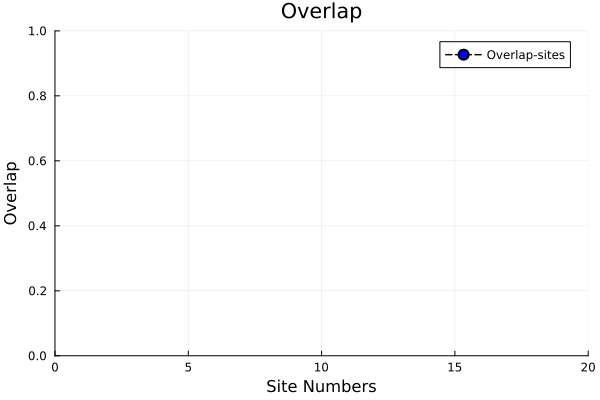

In [12]:
plot(x,y,linestyle=:dash ,title="Overlap",marker = :circle,
        markersize = 2.5, 
    markercolor=:blue,
        xlim=[0,20],
    ylim=[0.0,1],
    linecolor=:black,
        label = ["Overlap-sites" "Line 2"],xlabel="Site Numbers",
        ylabel="Overlap",
#     yticks=0.65:0.01:0.7,
#     xticks=0:1:10,
    lw=1.5)

savefig(plot(x,y,linestyle=:dash ,title="Overlap",marker = :circle,
        markersize = 2.5, markercolor=:blue,
        xlim=[0,12],ylim=[0.65,0.70],linecolor=:black,
        label = ["Overlap-sites" "Line 2"],xlabel="Site Numbers",
        ylabel="Overlap",yticks=0.65:0.01:0.7,xticks=0:1:10,lw=1.5),"One.png")

p1 = plot(x_odd,y_odd,linestyle=:dash ,title="Overlap-sites-Odd",marker = :circle,
        markersize = 2.5, markercolor=:blue,
        xlim=[0,40],ylim=[-0.5,1.5],linecolor=:black,
        label = ["Overlap-sites" "Line 2"],xlabel="Site Numbers",
        ylabel="Overlap",yticks=-0.5:0.5:1.5,xticks=0:5:70,lw=1.5)

p2 = plot(x_even,y_even,linestyle=:dash ,title="Overlap-sites-Even",marker = :circle,
        markersize = 2.5, markercolor=:red,
        xlim=[0,40],ylim=[-0.5,1.5],linecolor=:black,
        label = ["Overlap-sites" "Line 2"],xlabel="Site Numbers",
        ylabel="Overlap",yticks=-0.5:0.5:1.5,xticks=0:5:70,lw=1.5)

savefig(plot(p1,p2,layout= grid(1,2,heights=(1,2),width=(1,1)) ),"Even_Odd_nonW")
# width=[3,3]

# Part 1.2

In [1]:
using ITensors 
using Plots

In [47]:
# 1 
# function definition 
function Wilson_Fermion(L::Integer,m₀::Float64,g²::Float64,r::Float64,sw::Integer)
#     L = 2N;
    l = L-1;
    aₗ = 1.0/L;
    aₛ = 1.0/l;
    BDₗ = 2^(div(L,2));
    BDₛ = 2^(div(l,2));
    sites = siteinds("Fermion",L)
    ampoₗ = OpSum()
    ampoₛ = OpSum()
    ##################################################
    # larger lattice 
    # H_0 1
    for j in 1:2:L-2
        ampoₗ -= (1im/(2aₗ)),"C",j,"Cdag",j+2
        ampoₗ += (1im/(2aₗ)),"C",j+2,"Cdag",j
    end
    # H_0 2
    for j in 2:2:L-2
        ampoₗ += (1im/(2aₗ)),"C",j,"Cdag",j+2
        ampoₗ -= (1im/(2aₗ)),"C",j+2,"Cdag",j
    end
    # H_m     
    for j in 1:2:(L-1)
        ampoₗ -= (1im*m₀),"Cdag",j,"Cdag",j+1
        ampoₗ += (1im*m₀),"C",j+1,"C",j           
    end
   # H_g
    for j in 1:2:L-1      
        ampoₗ -= (g²/(2aₗ)),"C*Cdag",j,"Cdag*C",j+1
        ampoₗ -= (g²/(2aₗ)),"Cdag*C",j,"C*Cdag",j+1
    end
    ################################
    # H_W
    # H_W 1
    for j in 2:2:(L-1)
        ampoₗ += (1im*r/(2aₗ)),"C",j,"Cdag",j+1
        ampoₗ -= (1im*r/(2aₗ)),"C",j+1,"Cdag",j
    end
    # H_W 2
    for j in 1:2:(L-3)
        ampoₗ += (1im*r/(2aₗ)),"Cdag",j,"C",j+3
        ampoₗ -= (1im*r/(2aₗ)),"Cdag",j+3,"C",j
    end
    # H_W 3
    for j in 1:2:(L-1)
        ampoₗ -= (2im*r/aₗ),"Cdag",j,"C",j+1
        ampoₗ += (2im*r/aₗ),"Cdag",j+1,"C",j
    end
########################################################
    # Smaller lattice 
    # H_0 1
    for j in 1:2:l-2
        ampoₛ -= (1im/(2aₛ)),"C",j,"Cdag",j+2
        ampoₛ += (1im/(2aₛ)),"C",j+2,"Cdag",j
    end
    # H_0 2
    for j in 2:2:l-2
        ampoₛ += (1im/(2aₛ)),"C",j,"Cdag",j+2
        ampoₛ -= (1im/(2aₛ)),"C",j+2,"Cdag",j
    end
    # H_m
    for j in 1:2:(l-1)    
        ampoₛ -= (1im*m₀),"Cdag",j,"Cdag",j+1    
        ampoₛ += (1im*m₀),"C",j+1,"C",j
    end
   # H_g
    for j in 1:2:(l-1)  
        ampoₛ -= (g²/(2aₛ)),"C*Cdag",j,"Cdag*C",j+1
        ampoₛ -= (g²/(2aₛ)),"Cdag*C",j,"C*Cdag",j+1
    end
    # H_W
    # H_W 1
    for j in 2:2:(l-1)
        ampoₛ += (1im*r/(2aₛ)),"C",j,"Cdag",j+1
        ampoₛ -= (1im*r/(2aₛ)),"C",j+1,"Cdag",j
    end
    # H_W 2
    for j in 1:2:(l-3)
        ampoₛ += ((1im*r)/(2aₛ)),"Cdag",j,"C",j+3  
        ampoₛ -= (1im*r/(2aₛ)),"Cdag",j+3,"C",j
    end
    # H_W 3
    for j in 1:2:(l-1)
        ampoₛ -= (1im*r/(aₛ)),"Cdag",j,"C",j+1
        ampoₛ += (1im*r/(aₛ)),"Cdag",j+1,"C",j
    end
    #####################################################
    # Initial parameters
    ψ₀ₗ = randomMPS(sites,BDₗ)
    ψ₀ₛ = randomMPS(sites[1:l],BDₛ)
    Hₗ = MPO(ampoₗ,sites)
    Hₛ = MPO(ampoₛ,sites[1:l])
    sweep = Sweeps(sw)
    setmaxdim!(sweep,repeat([500],sw)...)
    setcutoff!(sweep,1E-10)
    eₗ, ψₗ = dmrg(Hₗ,ψ₀ₗ,sweep)
    eₛ, ψₛ = dmrg(Hₛ,ψ₀ₛ,sweep)
    ###############################################
    # new method for overlap computation
#     t1 = ITensor(sites[L-1:L])
#     for j in 1:4
#         t1[j]=1.0/2
#     end
    t1 = ITensor(sites[L])
    for j in 1:2
        t1[j]=1.0/2
    end
#     for i in 1:Int(size(t1)[1]), j in 1:Int(size(t1)[2])
#         t1[i,j] = 1.0/(2.0)
#     end
      #  Overlap computation
    v = ITensor(1.0)
    for j in 1:L
        if j <= l
            v = v*dag(ψₛ[j])*ψₗ[j]
        else
            v = v*t1*ψₗ[j]
        end
    end
    return inner(v,v), norm(v)

end

Wilson_Fermion (generic function with 1 method)

In [42]:
# 2
# first computation
# Wilson_Fermion(L::Integer,m₀::Float64,g²::Float64,r::Float64,sw::Integer)
Wilson_Fermion(6,0.4,1.0,0.71,5)

After sweep 1 energy=-36.825931222742 maxlinkdim=8 maxerr=3.79E-16 time=0.008
After sweep 2 energy=-36.825931247870 maxlinkdim=8 maxerr=3.03E-16 time=0.011
After sweep 3 energy=-36.825931247870 maxlinkdim=8 maxerr=5.15E-16 time=0.009
After sweep 4 energy=-36.825931247870 maxlinkdim=8 maxerr=7.75E-16 time=0.009
After sweep 5 energy=-36.825931247870 maxlinkdim=8 maxerr=2.63E-16 time=0.010
After sweep 1 energy=-14.322720134197 maxlinkdim=4 maxerr=1.18E-16 time=0.011
After sweep 2 energy=-14.322720406118 maxlinkdim=4 maxerr=1.31E-16 time=0.011
After sweep 3 energy=-14.322720406118 maxlinkdim=4 maxerr=1.21E-16 time=0.009
After sweep 4 energy=-14.322720406118 maxlinkdim=4 maxerr=1.87E-16 time=0.009
After sweep 5 energy=-14.322720406118 maxlinkdim=4 maxerr=4.63E-17 time=0.011
0.2111307558360018 + 0.0im
0.4594896689110668
0.2111307558360018


In [ ]:
# 3
inner_W_F = Vector{ComplexF64}()
norm_W_F = Vector{Float64}()


for j in 3:10 
    n1,n2 = Wilson_Fermion(j,0.4,1.0,0.71,5)
    push!(inner_W_F,n1)
    push!(norm_W_F,n2)
end

After sweep 1 energy=-6.050160121776 maxlinkdim=2 maxerr=1.58E-16 time=0.002
After sweep 2 energy=-6.050160121776 maxlinkdim=2 maxerr=8.88E-16 time=0.003
After sweep 3 energy=-6.050160121776 maxlinkdim=2 maxerr=9.44E-16 time=0.004
After sweep 4 energy=-6.050160121776 maxlinkdim=2 maxerr=5.59E-17 time=0.003
After sweep 5 energy=-6.050160121776 maxlinkdim=2 maxerr=1.22E-15 time=0.004
After sweep 1 energy=-2.419999999984 maxlinkdim=2 maxerr=0.00E+00 time=0.002
After sweep 2 energy=-2.420000000000 maxlinkdim=2 maxerr=0.00E+00 time=0.001
After sweep 3 energy=-2.420000000000 maxlinkdim=2 maxerr=0.00E+00 time=0.001
After sweep 4 energy=-2.420000000000 maxlinkdim=2 maxerr=0.00E+00 time=0.001
After sweep 5 energy=-2.420000000000 maxlinkdim=2 maxerr=0.00E+00 time=0.001
After sweep 1 energy=-16.132302244522 maxlinkdim=4 maxerr=4.99E-16 time=0.008
After sweep 2 energy=-16.132302252157 maxlinkdim=4 maxerr=4.75E-16 time=0.009
After sweep 3 energy=-16.132302252157 maxlinkdim=4 maxerr=4.11E-16 time=0.

After sweep 1 energy=-104.058110307656 maxlinkdim=48 maxerr=9.85E-11 time=0.123
After sweep 2 energy=-104.058119419744 maxlinkdim=27 maxerr=9.20E-11 time=0.079
After sweep 3 energy=-104.058119419752 maxlinkdim=27 maxerr=9.26E-11 time=0.078
After sweep 4 energy=-104.058119419752 maxlinkdim=27 maxerr=9.26E-11 time=0.079
After sweep 5 energy=-104.058119419752 maxlinkdim=27 maxerr=9.26E-11 time=0.082
After sweep 1 energy=-203.812821905279 maxlinkdim=42 maxerr=8.78E-11 time=0.279
After sweep 2 energy=-203.812831503602 maxlinkdim=22 maxerr=9.24E-11 time=0.109
After sweep 3 energy=-203.812831503594 maxlinkdim=22 maxerr=8.05E-11 time=0.108
After sweep 4 energy=-203.812831503594 maxlinkdim=22 maxerr=8.04E-11 time=0.098
After sweep 5 energy=-203.812831503594 maxlinkdim=22 maxerr=8.04E-11 time=0.095
After sweep 1 energy=-114.580371445358 maxlinkdim=52 maxerr=9.28E-11 time=0.164
After sweep 2 energy=-114.580385247837 maxlinkdim=33 maxerr=9.93E-11 time=0.164
After sweep 3 energy=-114.580385247888 m

After sweep 4 energy=-354.426355807005 maxlinkdim=36 maxerr=9.41E-11 time=0.291
After sweep 5 energy=-354.426355807004 maxlinkdim=36 maxerr=9.41E-11 time=0.274


In [1]:
x = [x for x in 3:30];
y = [y for y in norm_W_F];

LoadError: UndefVarError: norm_W_F not defined

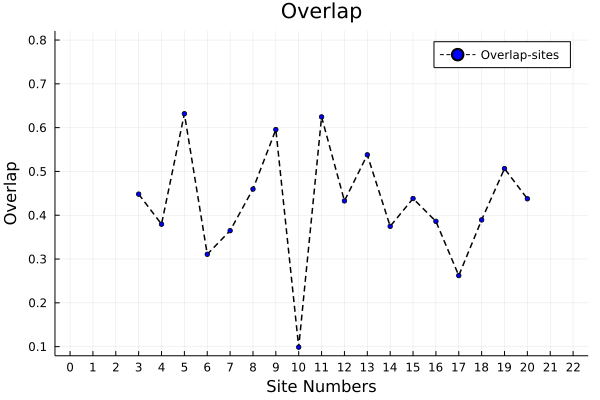

In [62]:
plot(x,y,linestyle=:dash ,title="Overlap",marker = :circle,
        markersize = 2.5, markercolor=:blue,
        xlim=[0,22],ylim=[0.1,0.8],linecolor=:black,
        label = ["Overlap-sites" "Line 2"],xlabel="Site Numbers",
        ylabel="Overlap",yticks=0.1:0.1:0.8,xticks=0:22,lw=1.5)

# Part 2

In [2]:
using ITensors 
L = 6;
aₗ = 1.0/6;
aₛ = 1.0/(L-2);
m₀ = 1.0;
g₀² = 1;
r = 1; # 0.71 
sites = siteinds("Fermion",L);
ampoₛ = OpSum();
ampoₗ = OpSum();

# Larger lattice

###  H_0

In [3]:
for j in 1:2:(L-2)
    ampoₗ -= (1im/2aₗ),"C",j,"Cdag",j+2
    ampoₗ += (1im/2aₗ),"C",j+2,"Cdag",j
end
for j in 2:2:(L-2)
    ampoₗ += (1im/2aₗ),"C",j,"Cdag",j+2
    ampoₗ -= (1im/2aₗ),"C",j+2,"Cdag",j
end
for j in 1:2:(L-1)
    ampoₗ -= (1im*m₀),"Cdag",j,"Cdag",j+1
    ampoₗ += (1im*m₀),"C",j+1,"C",j
end

In [4]:
ψ₀ₗ = randomMPS(sites,10);
Hₗ = MPO(ampoₗ,sites);
sweep = Sweeps(3)
setmaxdim!(sweep,repeat([10],3)...)
setcutoff!(sweep,1E-10)
eₗ,ψₗ = dmrg(Hₗ,ψ₀ₗ,sweep)

After sweep 1 energy=-9.708149677196 maxlinkdim=8 maxerr=1.97E-16 time=25.404
After sweep 2 energy=-9.717768580425 maxlinkdim=8 maxerr=3.00E-16 time=0.036
After sweep 3 energy=-9.717797798929 maxlinkdim=8 maxerr=2.93E-16 time=0.013


(-9.717797798928842, MPS
[1] ((dim=2|id=882|"Link,l=1"), (dim=2|id=538|"Fermion,Site,n=1"))
[2] ((dim=4|id=244|"Link,l=2"), (dim=2|id=484|"Fermion,Site,n=2"), (dim=2|id=882|"Link,l=1"))
[3] ((dim=2|id=762|"Fermion,Site,n=3"), (dim=8|id=689|"Link,l=3"), (dim=4|id=244|"Link,l=2"))
[4] ((dim=2|id=222|"Fermion,Site,n=4"), (dim=4|id=114|"Link,l=4"), (dim=8|id=689|"Link,l=3"))
[5] ((dim=2|id=919|"Fermion,Site,n=5"), (dim=2|id=249|"Link,l=5"), (dim=4|id=114|"Link,l=4"))
[6] ((dim=2|id=412|"Fermion,Site,n=6"), (dim=2|id=249|"Link,l=5"))
)

$$
H_g = -\frac{g_{0}^{2}}{2a} \sum_{n=1}^{L} \left[ \left(a_{n,0}^- a_{n,0}^+\right) \left(a_{n,1}^+ a_{n,1}^-\right)+ \left(a_{n,0}^+ a_{n,0}^-\right) \left(a_{n,1}^- a_{n,1}^+\right) \right]
$$

In [3]:
for j in 1:2:(L-1)  
    ampoₗ -= (g₀²/(2aₗ)),"C*Cdag",j,"Cdag*C",j+1
    ampoₗ -= (g₀²/(2aₗ)),"Cdag*C",j,"C*Cdag",j+1
end

In [4]:
# H_W
# _1_W2
for j in 2:2:(L-1)
    ampoₗ += (1im*r/(2aₗ)),"C",j,"Cdag",j+1
    ampoₗ -= (1im*r/(2aₗ)),"C",j+1,"Cdag",j
end

# _2_W2
for j in 1:2:(L-3)
    ampoₗ += (1im*r/(2aₗ)),"Cdag",j,"C",j+3
    ampoₗ -= (1im*r/(2aₗ)),"Cdag",j+3,"C",j
end

# _3_W2
for j in 1:2:(L-1)
    ampoₗ -= (1im*r/aₗ),"Cdag",j,"C",j+1
    ampoₗ += (1im*r/aₗ),"Cdag",j+1,"C",j
end

In [5]:
ψ₀ₗ = randomMPS(sites,10);
Hₗ = MPO(ampoₗ,sites);
sweep = Sweeps(3)
setmaxdim!(sweep,repeat([10],3)...)
setcutoff!(sweep,1E-10)
eₗ,ψₗ = dmrg(Hₗ,ψ₀ₗ,sweep)

After sweep 1 energy=-30.749656187944 maxlinkdim=8 maxerr=4.32E-16 time=26.968
After sweep 2 energy=-30.749657178285 maxlinkdim=8 maxerr=2.23E-16 time=0.006
After sweep 3 energy=-30.749657178285 maxlinkdim=8 maxerr=4.25E-16 time=0.007


(-30.74965717828474, MPS
[1] ((dim=2|id=262|"Link,l=1"), (dim=2|id=518|"Fermion,Site,n=1"))
[2] ((dim=4|id=769|"Link,l=2"), (dim=2|id=626|"Fermion,Site,n=2"), (dim=2|id=262|"Link,l=1"))
[3] ((dim=2|id=996|"Fermion,Site,n=3"), (dim=8|id=113|"Link,l=3"), (dim=4|id=769|"Link,l=2"))
[4] ((dim=2|id=217|"Fermion,Site,n=4"), (dim=4|id=398|"Link,l=4"), (dim=8|id=113|"Link,l=3"))
[5] ((dim=2|id=476|"Fermion,Site,n=5"), (dim=2|id=340|"Link,l=5"), (dim=4|id=398|"Link,l=4"))
[6] ((dim=2|id=999|"Fermion,Site,n=6"), (dim=2|id=340|"Link,l=5"))
)

$$
H_g = -\frac{g_{0}^{2}}{2a} \sum_{n=1}^{L} \left[ \left(a_{n,0}^- a_{n,0}^+\right) \otimes\left(a_{n,1}^+ a_{n,1}^-\right)+ \left(a_{n,0}^+ a_{n,0}^-\right) \otimes \left(a_{n,1}^- a_{n,1}^+\right) \right]
$$

In [1]:
using ITensors

In [2]:
function Wilson_Fermion(L::Integer,m₀::Float64,g²::Float64,r::Float64,BD::Integer,sw::Integer)
    l = L-2;
    aₗ = 1.0/L;
    aₛ = 1.0/l;
    sites = siteinds("Fermion",L)
    ampoₗ = OpSum()
    ampoₛ = OpSum()
    ##################################################
    # larger lattice 
    # H_0 1
    for j in 1:2:L-2
        ampoₗ -= (1im/2aₗ),"C",j,"Cdag",j+2
        ampoₗ += (1im/2aₗ),"C",j+2,"Cdag",j
    end
    # H_0 2
    for j in 2:2:L-2
        ampoₗ += (1im/2aₗ),"C",j,"Cdag",j+2
        ampoₗ -= (1im/2aₗ),"C",j+2,"Cdag",j
    end
    # H_m     
    for j in 1:2:(L-1)
        ampoₗ -= (1im*m₀),"Cdag",j,"Cdag",j+1
        ampoₗ += (1im*m₀),"C",j+1,"C",j           
    end
   # H_g
    for j in 1:2:L-1      # we should add :2 
        ampoₗ -= (g²/2aₗ),"C*Cdag",j,"Cdag*C",j+1
        ampoₗ -= (g²/2aₗ),"Cdag*C",j,"C*Cdag",j+1
    end
    ################################
    # H_W
    # H_W 1
    for j in 2:2:(L-1)
        ampoₗ += (1im*r/2aₗ),"C",j,"Cdag",j+1
        ampoₗ -= (1im*r/2aₗ),"C",j+1,"Cdag",j
    end
    # H_W 2
    for j in 1:2:(L-3)
        ampoₗ += (1im*r/2aₗ),"Cdag",j,"C",j+3
        ampoₗ -= (1im*r/2aₗ),"Cdag",j+3,"C",j
    end
    # H_W 3
    for j in 1:2:(L-1)
        ampoₗ -= (2im*r/aₗ),"Cdag",j,"C",j+1
        ampoₗ += (2im*r/aₗ),"Cdag",j+1,"C",j
    end
########################################################
    # Smaller lattice 
    # H_0 1
    for j in 1:2:l-2
        ampoₛ -= (1im/2aₛ),"C",j,"Cdag",j+2
        ampoₛ += (1im/2aₛ),"C",j+2,"Cdag",j
    end
    # H_0 2
    for j in 2:2:l-2
        ampoₛ += (1im/2aₛ),"C",j,"Cdag",j+2
        ampoₛ -= (1im/2aₛ),"C",j+2,"Cdag",j
    end
    # H_m
    for j in 1:2:(l-1)    
        ampoₛ -= (1im*m₀),"Cdag",j,"Cdag",j+1    
        ampoₛ += (1im*m₀),"C",j+1,"C",j
    end
   # H_g
    for j in 1:2:(l-1)  
        ampoₛ -= (g²/2aₛ),"C*Cdag",j,"Cdag*C",j+1
        ampoₛ -= (g²/2aₛ),"Cdag*C",j,"C*Cdag",j+1
    end
    # H_W
    # H_W 1
    for j in 2:2:(l-1)
        ampoₛ += (1im*r/2aₛ),"C",j,"Cdag",j+1
        ampoₛ -= (1im*r/2aₛ),"C",j+1,"Cdag",j
    end
    # H_W 2
    for j in 1:2:(l-3)
        ampoₛ += ((1im*r)/(2aₛ)),"Cdag",j,"C",j+3  
        ampoₛ -= (1im*r/(2aₛ)),"Cdag",j+3,"C",j
    end
    # H_W 3
    for j in 1:2:(l-1)
        ampoₛ -= (1im*r/(aₛ)),"Cdag",j,"C",j+1
        ampoₛ += (1im*r/(aₛ)),"Cdag",j+1,"C",j
    end
    #####################################################
    # Initial parameters
    ψ₀ₗ = randomMPS(sites,BD)
    ψ₀ₛ = randomMPS(sites[1:l],BD)
    Hₗ = MPO(ampoₗ,sites)
    Hₛ = MPO(ampoₛ,sites[1:l])
    sweep = Sweeps(sw)
    setmaxdim!(sweep,repeat([20],sw)...)
    setcutoff!(sweep,1E-10)
    eₗ, ψₗ = dmrg(Hₗ,ψ₀ₗ,sweep)
    eₛ, ψₛ = dmrg(Hₛ,ψ₀ₛ,sweep)
    ###############################################
      #  Overlap computation
    t1 = ITensor(sites[L-1:L])
    for i in 1:Int(size(t1)[1]), j in 1:Int(size(t1)[2])
        t1[i,j] = 1.0/(2.0)
    end
    v = ITensor(1.0)
    for j in 1:L
        if j <= L-2
            v = v*dag(ψₛ[j])*ψₗ[j]
        else
            v = v*t1*ψₗ[j]
        end
    end
    return inner(v,v), norm(v)
end

Wilson_Fermion (generic function with 1 method)

In [4]:
# Wilson_Fermion(L::Integer,m₀::Float64,g²::Float64,r::Float64,BD::Integer,sw::Integer)
# Wilson_spinhalf(10,1.0,1.0,0.71,10,3)
Wilson_Fermion(10,1.0,1.0,0.71,10,3)

After sweep 1 energy=-103.491515678288 maxlinkdim=20 maxerr=6.22E-10 time=26.063
After sweep 2 energy=-103.491525833281 maxlinkdim=18 maxerr=8.16E-11 time=0.044
After sweep 3 energy=-103.491525833280 maxlinkdim=18 maxerr=5.60E-11 time=0.078
After sweep 1 energy=-45.605937954912 maxlinkdim=16 maxerr=4.96E-16 time=0.021
After sweep 2 energy=-45.605944468229 maxlinkdim=16 maxerr=3.26E-16 time=0.023
After sweep 3 energy=-45.605944468228 maxlinkdim=16 maxerr=4.15E-16 time=0.027


(0.4581444953876592 + 0.0im, 0.6768637199522953)

In [150]:
inner_W = Vector{ComplexF64}()
norm_W = Vector{Float64}()

for j in 5:70
    n1,n2 = Wilson_one_flavor(j,1.0/(j-2),1.0/j,0.4,1.0,1,40,5)
    push!(inner_W,n1)
    push!(norm_W,n2)
end


After sweep 1 energy=-8.633224220349 maxlinkdim=2 maxerr=2.08E-17 time=0.003
After sweep 2 energy=-8.633224220349 maxlinkdim=2 maxerr=5.71E-17 time=0.003
After sweep 3 energy=-8.633224220349 maxlinkdim=2 maxerr=1.73E-17 time=0.003
After sweep 4 energy=-8.633224220349 maxlinkdim=2 maxerr=6.92E-17 time=0.003
After sweep 5 energy=-8.633224220349 maxlinkdim=2 maxerr=1.46E-16 time=0.003
After sweep 1 energy=-19.751609086980 maxlinkdim=4 maxerr=3.31E-16 time=0.008
After sweep 2 energy=-19.791978604652 maxlinkdim=4 maxerr=3.35E-16 time=0.006
After sweep 3 energy=-19.794013731420 maxlinkdim=4 maxerr=4.45E-16 time=0.041
After sweep 4 energy=-19.794116140387 maxlinkdim=4 maxerr=3.74E-16 time=0.010
After sweep 5 energy=-19.794121050034 maxlinkdim=4 maxerr=3.21E-16 time=0.010
After sweep 1 energy=-21.864523765769 maxlinkdim=4 maxerr=2.20E-16 time=0.009
After sweep 2 energy=-21.864523785046 maxlinkdim=4 maxerr=3.86E-16 time=0.008
After sweep 3 energy=-21.864523785046 maxlinkdim=4 maxerr=2.40E-16 ti

After sweep 5 energy=-229.587317769591 maxlinkdim=20 maxerr=1.19E-10 time=0.076
After sweep 1 energy=-280.889373740292 maxlinkdim=20 maxerr=5.85E-04 time=0.111
After sweep 2 energy=-281.053286119116 maxlinkdim=20 maxerr=2.05E-08 time=0.106
After sweep 3 energy=-281.061051050329 maxlinkdim=20 maxerr=5.03E-09 time=0.095
After sweep 4 energy=-281.061069922987 maxlinkdim=20 maxerr=2.37E-09 time=0.107
After sweep 5 energy=-281.061070494439 maxlinkdim=20 maxerr=1.41E-09 time=0.099
After sweep 1 energy=-283.455373849213 maxlinkdim=20 maxerr=5.91E-05 time=0.092
After sweep 2 energy=-283.455399048713 maxlinkdim=20 maxerr=1.42E-10 time=0.093
After sweep 3 energy=-283.455399049004 maxlinkdim=20 maxerr=1.13E-10 time=0.089
After sweep 4 energy=-283.455399049012 maxlinkdim=20 maxerr=1.13E-10 time=0.111
After sweep 5 energy=-283.455399049013 maxlinkdim=20 maxerr=1.13E-10 time=0.101
After sweep 1 energy=-338.311086350486 maxlinkdim=20 maxerr=2.47E-04 time=0.136
After sweep 2 energy=-338.583127962158 m

After sweep 3 energy=-837.970491341244 maxlinkdim=20 maxerr=1.54E-08 time=0.192
After sweep 4 energy=-837.975129018889 maxlinkdim=20 maxerr=3.83E-09 time=0.222
After sweep 5 energy=-837.975293323449 maxlinkdim=20 maxerr=1.78E-09 time=0.218
After sweep 1 energy=-840.686682417921 maxlinkdim=20 maxerr=1.45E-03 time=0.253
After sweep 2 energy=-840.687250103038 maxlinkdim=20 maxerr=4.45E-10 time=0.217
After sweep 3 energy=-840.687250116055 maxlinkdim=20 maxerr=1.15E-10 time=0.203
After sweep 4 energy=-840.687250116127 maxlinkdim=20 maxerr=1.15E-10 time=0.207
After sweep 5 energy=-840.687250116132 maxlinkdim=20 maxerr=1.15E-10 time=0.204
After sweep 1 energy=-934.193135591995 maxlinkdim=20 maxerr=1.69E-03 time=0.211
After sweep 2 energy=-934.539119457588 maxlinkdim=20 maxerr=5.05E-09 time=0.234
After sweep 3 energy=-934.543443742368 maxlinkdim=20 maxerr=8.30E-09 time=0.230
After sweep 4 energy=-934.543483187419 maxlinkdim=20 maxerr=1.88E-09 time=0.234
After sweep 5 energy=-934.543483923315 m

After sweep 5 energy=-1690.533051978534 maxlinkdim=20 maxerr=1.61E-09 time=0.355
After sweep 1 energy=-1693.539770706830 maxlinkdim=20 maxerr=2.27E-03 time=0.338
After sweep 2 energy=-1693.561272081449 maxlinkdim=20 maxerr=4.52E-10 time=0.257
After sweep 3 energy=-1693.561272109292 maxlinkdim=20 maxerr=1.17E-10 time=0.317
After sweep 4 energy=-1693.561272109492 maxlinkdim=20 maxerr=1.16E-10 time=0.318
After sweep 5 energy=-1693.561272109518 maxlinkdim=20 maxerr=1.16E-10 time=0.337
After sweep 1 energy=-1823.002354821233 maxlinkdim=20 maxerr=2.60E-03 time=0.387
After sweep 2 energy=-1825.777958424238 maxlinkdim=20 maxerr=1.48E-08 time=0.320
After sweep 3 energy=-1826.124894059772 maxlinkdim=20 maxerr=6.94E-08 time=0.283
After sweep 4 energy=-1826.135262130242 maxlinkdim=20 maxerr=1.06E-08 time=0.345
After sweep 5 energy=-1826.135448599568 maxlinkdim=20 maxerr=3.15E-09 time=0.347
After sweep 1 energy=-1756.318701385353 maxlinkdim=20 maxerr=2.22E-03 time=0.379
After sweep 2 energy=-1756.3

After sweep 2 energy=-2842.077738302058 maxlinkdim=20 maxerr=5.29E-10 time=0.432
After sweep 3 energy=-2842.077738323791 maxlinkdim=20 maxerr=1.18E-10 time=0.379
After sweep 4 energy=-2842.077738324144 maxlinkdim=20 maxerr=1.17E-10 time=0.415
After sweep 5 energy=-2842.077738324192 maxlinkdim=20 maxerr=1.17E-10 time=0.437
After sweep 1 energy=-3010.604719623547 maxlinkdim=20 maxerr=2.15E-03 time=0.536
After sweep 2 energy=-3013.360142443699 maxlinkdim=20 maxerr=8.48E-09 time=0.423
After sweep 3 energy=-3013.369611548714 maxlinkdim=20 maxerr=3.44E-09 time=0.385
After sweep 4 energy=-3013.369895676333 maxlinkdim=20 maxerr=2.65E-09 time=0.442
After sweep 5 energy=-3013.369898854907 maxlinkdim=20 maxerr=9.58E-10 time=0.454
After sweep 1 energy=-2923.284909467026 maxlinkdim=20 maxerr=2.72E-03 time=0.485
After sweep 2 energy=-2923.319750824745 maxlinkdim=20 maxerr=7.04E-10 time=0.480
After sweep 3 energy=-2923.319750907196 maxlinkdim=20 maxerr=1.50E-10 time=0.435
After sweep 4 energy=-2923.3

After sweep 4 energy=-4286.236719631379 maxlinkdim=20 maxerr=1.17E-10 time=0.495
After sweep 5 energy=-4286.236719631444 maxlinkdim=20 maxerr=1.17E-10 time=0.482
After sweep 1 energy=-4488.537673061219 maxlinkdim=20 maxerr=2.30E-03 time=0.775
After sweep 2 energy=-4495.638297844088 maxlinkdim=20 maxerr=2.16E-08 time=0.520
After sweep 3 energy=-4496.226359745197 maxlinkdim=20 maxerr=6.59E-08 time=0.502
After sweep 4 energy=-4496.246708940135 maxlinkdim=20 maxerr=1.48E-08 time=0.638
After sweep 5 energy=-4496.246874910771 maxlinkdim=20 maxerr=2.72E-09 time=0.568
After sweep 1 energy=-4385.902001365763 maxlinkdim=20 maxerr=2.40E-03 time=0.574
After sweep 2 energy=-4385.960553068274 maxlinkdim=20 maxerr=7.52E-10 time=0.557
After sweep 3 energy=-4385.960553041497 maxlinkdim=20 maxerr=1.55E-10 time=0.559
After sweep 4 energy=-4385.960553041471 maxlinkdim=20 maxerr=1.44E-10 time=0.546
After sweep 5 energy=-4385.960553041295 maxlinkdim=20 maxerr=1.44E-10 time=0.550
After sweep 1 energy=-4604.6

After sweep 1 energy=-6272.240052333827 maxlinkdim=20 maxerr=2.16E-03 time=0.806
After sweep 2 energy=-6274.760132729565 maxlinkdim=20 maxerr=8.08E-09 time=0.731
After sweep 3 energy=-6274.766397113972 maxlinkdim=20 maxerr=3.23E-09 time=0.698
After sweep 4 energy=-6274.766400132263 maxlinkdim=20 maxerr=8.30E-10 time=0.837
After sweep 5 energy=-6274.766400164652 maxlinkdim=20 maxerr=4.91E-10 time=0.828
After sweep 1 energy=-6144.137107276135 maxlinkdim=20 maxerr=2.20E-03 time=0.936
After sweep 2 energy=-6144.243928323459 maxlinkdim=20 maxerr=5.57E-10 time=0.652
After sweep 3 energy=-6144.243928471356 maxlinkdim=20 maxerr=1.56E-10 time=0.658
After sweep 4 energy=-6144.243928472121 maxlinkdim=20 maxerr=1.43E-10 time=0.981
After sweep 5 energy=-6144.243928472163 maxlinkdim=20 maxerr=1.43E-10 time=0.623
After sweep 1 energy=-6403.309685987251 maxlinkdim=20 maxerr=2.23E-03 time=0.847
After sweep 2 energy=-6405.276600046874 maxlinkdim=20 maxerr=1.30E-08 time=0.681
After sweep 3 energy=-6405.4

In [18]:
length(norm_W), norm_W[4]

(16, 0.7435138103598358)

## Without Wilson term

In [89]:
# y = []
# for j in 1:length(norm_W)
#     if iseven(j)
#         append!(y,norm_W[j])
#     end
# end

# y = [z for z in norm_W]
# x = [x for x in 1:length(y)];  
y_odd = []
y_even = []
for j in 1:length(norm_W)
    if isodd(j)
        append!(y_odd,norm_W[j])
    else
        append!(y_even,norm_W[j])
    end
end
x_odd = [x for x in 1:length(y_odd)];
x_even = [x for x in 1:length(y_even)];

In [147]:
p1 = plot(x_odd,y_odd,linestyle=:dash ,title="Overlap-sites-Odd",marker = :circle,
        markersize = 2.5, markercolor=:blue,
        xlim=[0,40],ylim=[-0.5,1.5],linecolor=:black,
        label = ["Overlap-sites" "Line 2"],xlabel="Site Numbers",
        ylabel="Overlap",yticks=-0.5:0.5:1.5,xticks=0:5:70,lw=1.5)

p2 = plot(x_even,y_even,linestyle=:dash ,title="Overlap-sites-Even",marker = :circle,
        markersize = 2.5, markercolor=:red,
        xlim=[0,40],ylim=[-0.5,1.5],linecolor=:black,
        label = ["Overlap-sites" "Line 2"],xlabel="Site Numbers",
        ylabel="Overlap",yticks=-0.5:0.5:1.5,xticks=0:5:70,lw=1.5)

savefig(plot(p1,p2,layout= grid(1,2,heights=(1,2),width=(1,1)) ),"Even_Odd_nonW")
# width=[3,3]

In [148]:
plot(x_odd,y_odd,linestyle=:dash ,title="Overlap-sites",marker = :circle,
        markersize = 2.5, markercolor=:blue,
        xlim=[0,40],ylim=[-0.5,1.5],linecolor=:black,
        label = ["Overlap-sites" "Line 2"],xlabel="Site Numbers",
        ylabel="Overlap",yticks=-0.5:0.5:1.5,xticks=0:5:70,lw=1.5)

savefig(plot!(x_even,y_even,linestyle=:dash ,title="Overlap-sites",marker = :circle,
        markersize = 2.5, markercolor=:red,
        xlim=[0,40],ylim=[-0.5,1.5],linecolor=:black,
        label = ["Overlap-sites" "Line 2"],xlabel="Site Numbers",
        ylabel="Overlap",yticks=-0.5:0.5:1.5,xticks=0:5:70,lw=1.5),"Even_Odd_nonW_both")

savefig(plot(x,y,linestyle=:dash ,title="Overlap-sites",marker = :star5, markersize = 2.5, markercolor=:red,
    xlim=[0,80],ylim=[-0.5,1.5],linecolor=:blue,label = ["sites" "Line 2"],xlabel="Site Numbers",
        ylabel="overlap_norm",yticks=-0.5:0.5:1.5,xticks=0:5:70,lw=1.5),"one.png")

## With Wilson term

In [151]:
y_odd_w = []
y_even_w = []
for j in 1:length(norm_W)
    if isodd(j)
        append!(y_odd_w,norm_W[j])
    else
        append!(y_even_w,norm_W[j])
    end
end
x_odd_w = [x for x in 1:length(y_odd_w)];
x_even_w = [x for x in 1:length(y_even_w)];

In [152]:
p1 = plot(x_odd_w,y_odd_w,linestyle=:dash ,title="Overlap-sites-Odd_W",marker = :circle,
        markersize = 2.5, markercolor=:blue,
        xlim=[0,40],ylim=[-0.5,1.5],linecolor=:black,
        label = ["Overlap-sites" "Line 2"],xlabel="Site Numbers",
        ylabel="Overlap",yticks=-0.5:0.5:1.5,xticks=0:5:70,lw=1.5)

p2 = plot(x_even_w,y_even_w,linestyle=:dash ,title="Overlap-sites-Even_w",marker = :circle,
        markersize = 2.5, markercolor=:red,
        xlim=[0,40],ylim=[-0.5,1.5],linecolor=:black,
        label = ["Overlap-sites" "Line 2"],xlabel="Site Numbers",
        ylabel="Overlap",yticks=-0.5:0.5:1.5,xticks=0:5:70,lw=1.5)

savefig(plot(p1,p2,layout= grid(1,2,heights=(1,2),width=(1,1)) ),"Even_Odd_W")
# width=[3,3]

In [153]:
plot(x_odd_w,y_odd_w,linestyle=:dash ,title="Overlap-sites_w",marker = :circle,
        markersize = 2.5, markercolor=:blue,
        xlim=[0,40],ylim=[-0.5,1.5],linecolor=:black,
        label = ["Overlap-sites" "Line 2"],xlabel="Site Numbers",
        ylabel="Overlap",yticks=-0.5:0.5:1.5,xticks=0:5:70,lw=1.5)

savefig(plot!(x_even_w,y_even_w,linestyle=:dash ,title="Overlap-sites_w",marker = :circle,
        markersize = 2.5, markercolor=:red,
        xlim=[0,40],ylim=[-0.5,1.5],linecolor=:black,
        label = ["Overlap-sites" "Line 2"],xlabel="Site Numbers",
        ylabel="Overlap",yticks=-0.5:0.5:1.5,xticks=0:5:70,lw=1.5),"Even_Odd_W_both")

In [ ]:
using ITensors
a = 1;
m = 0.2;
g = 1.5;
r = 1;
N = 1; # number of flavor
L = 6; # number of logical sites
BD = 40;
sites = siteinds("Fermion",L);
ampo = OpSum();

In [2]:
# H_0
for j in 1:(L-2)
    if isodd(j)
        ampo -= (1im/2a),"C",j,"Cdag",j+2
        ampo += (1im/2a),"C",j+2,"Cdag",j
    else
        ampo += (1im/2a),"C",j,"Cdag",j+2
        ampo -= (1im/2a),"C",j+2,"Cdag",j
    end
end
# # H_m
for j in 1:(L-1)
    ampo -= (1im*m),"Cdag",j,"Cdag",j+1
    ampo += (1im*m),"C",j+1,"C",j
end
# H_g
for j in 1:(L-1)
    ampo -= (g/2a),"C*Cdag",j,"Cdag*C",j+1
    ampo -= (g/2a),"Cdag*C",j,"C*Cdag",j+1
end
# H_W
for j in 1:(L-1)
    if iseven(j)
        ampo += (1im*r/2a),"C",j,"Cdag",j+1
        ampo -= (1im*r/2a),"C",j+1,"Cdag",j
    end
end
for j in 1:(L-3)
    if isodd(j)
        ampo += (1im*r/2a),"Cdag",j,"C",j+3
        ampo -= (1im*r/2a),"Cdag",j+3,"C",j
    end
end

for j in 1:(L-1)
    if isodd(j)
        ampo -= (1im*r/a),"Cdag",j,"C",j+1
        ampo += (1im*r/a),"Cdag",j+1,"C",j
    end
end

$$
H_g = -\frac{g_{0}^{2}}{2a} \sum_{n=1}^{L} \left[ \left(a_{n,0}^- a_{n,0}^+\right) \left(a_{n,1}^+ a_{n,1}^-\right)+ \left(a_{n,0}^+ a_{n,0}^-\right) \left(a_{n,1}^- a_{n,1}^+\right) \right]
$$

# Draft

In [2]:
N = 6;
n = N-1
sites = siteinds("Fermion",N)
ψ₁ = MPS(sites)
ψ₂ = MPS(sites[1:3])
ψ₃ = MPS(sites[4:6])

ϕ = MPS(N) 
for j in 1:N
    if j <= 3
        ϕ[j]=ψ₂[j]
    else
        ϕ[j]=ψ₃[j-3]
    end
end
ϕ

6-element Vector{Index{Int64}}:
 (dim=2|id=417|"Fermion,Site,n=1")
 (dim=2|id=617|"Fermion,Site,n=2")
 (dim=2|id=754|"Fermion,Site,n=3")
 (dim=2|id=291|"Fermion,Site,n=4")
 (dim=2|id=121|"Fermion,Site,n=5")
 (dim=2|id=319|"Fermion,Site,n=6")